In [70]:
# Import the relevant python libraries for the analysis
import pandas as pd
from pandas import DataFrame
import pylab as pl
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy import histogram
import random
import seaborn as sns
import scipy.stats as stats
import statistics
from statsmodels.distributions.empirical_distribution import ECDF

In [5]:
# Load the dataset
materna = pd.read_csv('../data/mortalidad_materna.csv')
#materna.info()

## Question 1: What is the Average Age of Maternal Death within the dataset?

### Step 1: Explore the Data and Create Clean Sub-Dataframe for Analysis

In [6]:
# 1. Combine patient birthdate information into one column
birth = DataFrame(materna, columns=['Año de nacimiento', 'Mes de nacimiento', 'Día de nacimiento'])
birth = materna['Año de nacimiento'].map(str) + '-' + materna['Mes de nacimiento'].map(str) + '-' + materna['Mes de nacimiento'].map(str)
print(birth.sort_values(ascending=True).head(2))
len(birth)

13088    0-0-0
12833    0-0-0
dtype: object


18163

In [7]:
# Combine patient date of death information into one column
death = DataFrame(materna, columns=['Año de la defunción', 'Mes de la defunción', 'Día de la defunción'])
death = materna['Año de la defunción'].map(str) + '-' + materna['Mes de la defunción'].map(str) + '-' + materna['Mes de la defunción'].map(str)
print(death.sort_values(ascending=True).head(2))
len(death)

17886       0-0-0
17516    1914-3-3
dtype: object


18163

In [8]:
# Create variable to store age fulfilled by patient and mortality reason
last_age = materna['Edad cumplida']
mortality_reason = materna['Razón de mortalidad materna']

# Create variables:

#providence information 
providence_code = materna['Entidad de residencia']
providence_key = materna['Descripción de entidad de residencia']

#local community info
local_size = materna['Tamaño de localidad']
population = materna['Descripción del tamaño de localidad']

In [9]:
# Create a sub-dataframe to hold all date- information 
dates = pd.concat([birth, death, last_age, mortality_reason, providence_code, providence_key, local_size, population], axis=1)
dates.columns = ['Date of Birth', 'Date of Death', 'Age at Death', 'Reason for Mortality', 'Residence Code', 'Residence Name', 'Local Community Size', 'Population']
dates.head(2)

,Date of Birth,Date of Death,Age at Death,Reason for Mortality,Residence Code,Residence Name,Local Community Size,Population
0,1972-7-7,2002-3-3,29,1,29,Tlaxcala,10,40000 a 49999 habitantes
1,1967-4-4,2003-5-5,36,1,29,Tlaxcala,10,40000 a 49999 habitantes


#### Check for null or errors in the dates sub-dataset

In [10]:
# Order dates dataframe to list in ascending order of approx. age at death
dates = dates.sort_values(by=['Age at Death'],ascending=True)
dates.head()

,Date of Birth,Date of Death,Age at Death,Reason for Mortality,Residence Code,Residence Name,Local Community Size,Population
9598,1998-7-7,2009-7-7,11,1,7,Chiapas,1,1 a 999 habitantes
6407,1996-1-1,2008-12-12,12,1,30,Veracruz de Ignacio de la Llave,11,50000 a 74999 habitantes
9084,2001-12-12,2014-5-5,12,1,27,Tabasco,14,250000 a 499999 habitantes
10883,1983-11-11,2002-6-6,12,1,15,México,4,2500 a 4999 habitantes
1266,1993-0-0,2005-1-1,12,1,12,Guerrero,4,2500 a 4999 habitantes


In [11]:
# Reset Index 
dates = dates.reset_index(drop=True)
dates.head()
dates.tail()

,Date of Birth,Date of Death,Age at Death,Reason for Mortality,Residence Code,Residence Name,Local Community Size,Population
18158,0-0-0,1975-2-2,998,0,25,Sinaloa,1,1 a 999 habitantes
18159,0-0-0,2006-9-9,998,1,27,Tabasco,12,75000 a 99999 habitantes
18160,0-0-0,2000-6-6,998,0,16,Michoacán de Ocampo,0,No Especificado.
18161,0-0-0,0-0-0,998,0,0,No especificado,0,No Especificado.
18162,0-0-0,2002-4-4,998,1,8,Chihuahua,1,1 a 999 habitantes


#### Check if all values make sense
- Case 1: It is biologically impossible to reach 998 years of age. These data entries appear to all have '0-0-0' in the 'Date of Birth' column and should therefore be removed from the sub-dataset, dates.
- Case 2: What do the '0' and '1' entires for 'Reason for Mortality' mean? If one of these keys is not associated with maternal death, then those entries should also be removed from the sub-dataset, dates.

In [12]:
# Remove rows with NaN / '0-0-0' values in Date of Birth
dates = dates[dates['Date of Birth'] != '0-0-0']
dates.tail()

,Date of Birth,Date of Death,Age at Death,Reason for Mortality,Residence Code,Residence Name,Local Community Size,Population
18134,1933-12-12,2015-8-8,81,0,9,Distrito Federal,15,500000 a 999999 habitantes
18135,1933-11-11,2015-12-12,82,0,15,México,14,250000 a 499999 habitantes
18136,1933-8-8,2015-9-9,82,0,24,San Luis Potosí,15,500000 a 999999 habitantes
18137,1930-1-1,2016-2-2,86,0,14,Jalisco,15,500000 a 999999 habitantes
18138,1930-8-8,2017-1-1,86,0,30,Veracruz de Ignacio de la Llave,2,1000 a 1999 habitantes


In [13]:
dates.head()

,Date of Birth,Date of Death,Age at Death,Reason for Mortality,Residence Code,Residence Name,Local Community Size,Population
0,1998-7-7,2009-7-7,11,1,7,Chiapas,1,1 a 999 habitantes
1,1996-1-1,2008-12-12,12,1,30,Veracruz de Ignacio de la Llave,11,50000 a 74999 habitantes
2,2001-12-12,2014-5-5,12,1,27,Tabasco,14,250000 a 499999 habitantes
3,1983-11-11,2002-6-6,12,1,15,México,4,2500 a 4999 habitantes
4,1993-0-0,2005-1-1,12,1,12,Guerrero,4,2500 a 4999 habitantes


**Case 1 Conclusion**: It appears that removing rows with '0-0-0' in the 'Date of Birth' column did remove all entries outside of the biological scope of maximum age at death. However, it is unlikely that a women who reached the age of 81 died due to maternal reasons since this age is outside the childe-bearing years. The analysis of the '0' and '1' in the 'Reason for Mortality' column may shed more light since all younger ages seem to be associated with '1' while older ages are associated with '0'. 

In [14]:
# Create a variable for the description of Reason for Mortality Description
mortality_description = materna['Descripción de la razón de mortalidad materna']

# Create a sub-dataframe to show interaction of Reason for Mortality Code and Description
mortality = pd.concat([mortality_reason, mortality_description], axis=1)
mortality.columns = ['Reason Mortality Code', 'Reason Mortality Description']
mortality.head()

,Reason Mortality Code,Reason Mortality Description
0,1,Muertes Maternas para la razón de Mortalidad M...
1,1,Muertes Maternas para la razón de Mortalidad M...
2,1,Muertes Maternas para la razón de Mortalidad M...
3,1,Muertes Maternas para la razón de Mortalidad M...
4,1,Muertes Maternas para la razón de Mortalidad M...


In [15]:
mortality.tail()

,Reason Mortality Code,Reason Mortality Description
18158,0,Muertes Maternas excluidas para la razón de Mo...
18159,0,Muertes Maternas excluidas para la razón de Mo...
18160,0,Muertes Maternas excluidas para la razón de Mo...
18161,0,Muertes Maternas excluidas para la razón de Mo...
18162,0,Muertes Maternas excluidas para la razón de Mo...


In [16]:
print('0 Description:')
print('Spanish: Muertes Maternas excluidas para la razón de Mortalidad Materna')
print('English: Maternal deaths excluded for the reason of Maternal Mortality')

0 Description:
Spanish: Muertes Maternas excluidas para la razón de Mortalidad Materna
English: Maternal deaths excluded for the reason of Maternal Mortality


In [17]:
print('1 Description:')
print('Spanish: Muertes Maternas para la razón de Mortalidad Materna')
print('English: Maternal deaths for the reason of Maternal Mortality')

1 Description:
Spanish: Muertes Maternas para la razón de Mortalidad Materna
English: Maternal deaths for the reason of Maternal Mortality


**Case 2 Conclusion**: Since '1' refers to recorded maternal-deaths and '0' refers to recorded deaths that are *not* associated with maternity, all rows containing '0' in the 'Reason for Mortality' column should be removed.

In [18]:
# Remove rows with 0 values in Reason for Mortality
dates = dates[dates['Reason for Mortality'] != 0 ]
dates.tail()

,Date of Birth,Date of Death,Age at Death,Reason for Mortality,Residence Code,Residence Name,Local Community Size,Population
18113,1960-3-3,2010-10-10,50,1,12,Guerrero,1,1 a 999 habitantes
18116,1960-1-1,2011-10-10,51,1,12,Guerrero,1,1 a 999 habitantes
18121,1963-12-12,2017-10-10,53,1,15,México,6,10000 a 14999 habitantes
18123,1961-8-8,2015-5-5,53,1,7,Chiapas,2,1000 a 1999 habitantes
18125,1942-12-12,2002-12-12,54,1,20,Oaxaca,3,2000 a 2499 habitantes


In [19]:
# Analyze shape of cleaned data
dates.describe()

,Age at Death,Reason for Mortality,Residence Code,Local Community Size
count,16636.000000,16636.0,16636.000000,16636.000000
mean,28.356756,1.0,16.279574,7.810050
std,7.323171,0.0,7.850170,5.912597
min,11.000000,1.0,1.000000,0.000000
25%,22.000000,1.0,10.000000,2.000000
50%,28.000000,1.0,15.000000,6.000000
75%,34.000000,1.0,21.000000,14.000000
max,54.000000,1.0,34.000000,17.000000


### Step 2: Exploratory Data Analysis
#### Record the Mean Age of Maternal Death within a Variable

In [22]:
# Create variable for maternal death
age_death = dates['Age at Death']

# Determine sample size for maternal death 
sample_size = len(age_death)
sample_size

16636

#### Plot Sample Age of Maternal Death Distribution

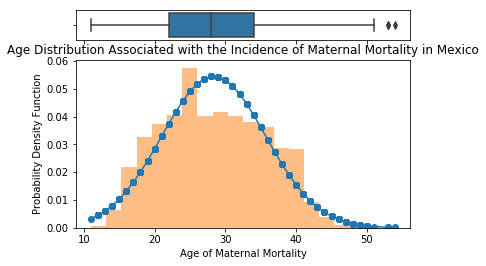

'The sample(n=16636) population mean age of maternal death is 28.36 years old with a standard deviation of 7.32.'

In [23]:
# Create a figure with two plots
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add boxplot for maternal death
sns.boxplot(age_death, ax=boxplot)

# Remove x-axis label from boxplot
boxplot.set(xlabel='')

# Add histogram and normal curve for maternal death
fit = stats.norm.pdf(age_death, np.mean(age_death), np.std(age_death))
pl.plot(age_death, fit, '-o')
pl.hist(age_death, density=True, alpha=0.5, bins=20)

# Label axis 
pl.xlabel('Age of Maternal Mortality')
pl.ylabel('Probability Density Function')
pl.title('Age Distribution Associated with the Incidence of Maternal Mortality in Mexico')

# Show plot and add print mean and std sample information
plt.show()
'The sample(n=' + str(sample_size) + ') population mean age of maternal death is ' + str(round(np.mean(age_death), 2)) + ' years old with a standard deviation of ' + str(round(np.std(age_death), 2)) + '.'


*Preliminary* **Conclusion**: The distribution appears to be generally normally distributed based off of the histogram of the maternal age at time of death. Since binning bias can occur, the Cumulative Distribution Function (CDF) needs to be analyzed. Based off of the Central Limit Theorem (CLT), the sampling distribution of the sample means approaches a normal distribution as the sample size ( n ) gets larger - regardless of what the shape of the population distribution. Under this theorem,  n>30  is considered a large sample size. Since the current database sample size  n  = 16636, CLT can be assumed.

#### Create an Empirical and Theoretical Cumulative Distribution Function (CDF)

In [24]:
# Create an Empirical Cumulative Distribution Function (ECDF)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(data)+1) / len(data)

    return x, y

#### Seed a Random Number Generator and Calculate Theoretical Dataset with Normal Distribution

In [25]:
# Seed the random number generator
np.random.seed(15)

# Compute the theoretical CDF 
cdf_mean = np.mean(age_death)
cdf_std = np.std(age_death)

# Simulate a random sample with the same distribution and size of 10,000
cdf_samples = np.random.normal(cdf_mean, cdf_std, size=10000)
cdf_samples

array([26.06959029, 30.84132168, 27.21504589, ..., 33.86348911,
       22.34975498, 28.10388849])

#### Apply the ecdf() function to Empirical and Theoretical Data to Calculate the CDFs

In [26]:
# Compute the CDFs
x_death, y_death = ecdf(age_death)
x_norm, y_norm = ecdf(cdf_samples)

#### Plot the Theoretical (normalized) CDF with the Empirical (sample) CDF

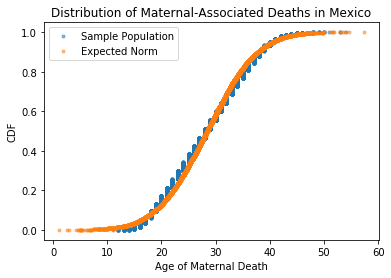

In [27]:
# Plot both ECDFs on same the same figure
fig = plt.plot(x_death, y_death, marker='.', linestyle='none', alpha=0.5)
fig = plt.plot(x_norm, y_norm, marker='.', linestyle='none', alpha=0.5)

# Label figure
fig = plt.xlabel('Age of Maternal Death')
fig = plt.ylabel('CDF')
fig = plt.legend(('Sample Population', 'Expected Norm'))
fig = plt.title('Distribution of Maternal-Associated Deaths in Mexico')

# Save plots
plt.show()

**Conclusion**: Since the normalized data and the sample population's empirical data follow along the same line, it can be assumed that the population sample is normally distributed.Therefore, based off of both the Central Limit Theorem (CLT) and the Empirical Cumulative Distribution Function (ECDF), the sample population of age of maternal death is normally distributed. 

### Step 3: Inferential Statistics: Bootstrap Simulation 

### How does the dataset's mean age of Maternal Mortality (28.36 years) compare to a Statistically-Likely Population Mean?

#### Statistical Testing of Data Mean

$H$o: The mean age of death of maternal women in Mexico is equal to the mean age of death presented in the dataset ($28.35 yoa$). <br>  Empirical Mean ($μ$) − Population Mean ($μ$) = 0

$H$a: The mean age of death of maternal women in Mexico is *not* equal to the mean age of death presented in the dataset ($28.35 yoa$). <br> Empirical Mean ($μ$) − Population Mean ($μ$) ≠ 0

Significance Level: *95%* Confidence. <br> $α$ = 0.05

#### Create a boostrap replicate function with another function to repeat the bootstrap replication 'x' number of times

In [28]:
# Create a bootstrap replicate function for repeatability
def bootstrap_replicate_1d(data, func):
    """Create a bootstrap replicates."""
    
    # Create bootstrap sample
    boot_sample = np.random.choice(data, size=len(data))
    
    # Apply function to the computed bootstrap sample
    return func(boot_sample)


# Create a function to apply the bootstrap replicate function 'n' and return an array
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    boot_rep = np.empty(size)

    # Generate 'n' number of replicates
    for i in range(size):
        boot_rep[i] = bootstrap_replicate_1d(data, func)

    return boot_rep

#### Calculate the size, mean, and standard deviation of *dates*[ 'Age at Death' ]

In [29]:
# Create variables for sample statistical information
materna_age_std = age_death.std()
materna_sample_size = len(age_death)
mean_age = dates['Age at Death'].mean()

# Create an array of the sample mean that is equal to the boostrap array length
materna_mean_arr = np.full(10000, mean_age)

print('sample size: ', materna_sample_size)
print('sample mean age of death: ', mean_age)
print('sample standard deviation: ', materna_age_std)

sample size:  16636
sample mean age of death:  28.356756431834576
sample standard deviation:  7.3231710220967


#### Create a 10,000 bootstrap replication

In [30]:
# Create 10000 bootstrap replicates of the mean and take the mean of the returned array
boot_tenthousand =  draw_bs_reps(age_death, np.mean, size=10000)
print('bootstrap mean age of death: ' + str(np.mean(boot_tenthousand)))

bootstrap mean age of death: 28.356761968021157


#### Calculate the difference between the bootrap and sample means with p-value and standard deviation

In [31]:
# Compute p-value
p_val = np.sum(boot_tenthousand >= materna_mean_arr) / len(boot_tenthousand)
print('p-value: {0:0.4f}'.format(p_val))

# Calculate the standard margin of error for a 95% confidence interval
conf_int_low = mean_age-(1.98*(materna_age_std/math.sqrt(materna_sample_size)))
conf_int_high = mean_age+(1.98*(materna_age_std/math.sqrt(materna_sample_size)))
print('95% Confidence Interval: [{0:0.4f}  {1:0.4f}]'.format(conf_int_low, conf_int_high))

p-value: 0.4943
95% Confidence Interval: [28.2443  28.4692]


**Conclusion from the Bootstrap Hypothesis Test:** The resulting population mean of maternal death approximation based on 10,000 bootstrap replicate samples was *28.3564 years of age (yoa)*, which is close to the sample mean of *28.3568 yoa* old from the dataset. Additionally, the bootstrap population mean is within the 95% Confidence Interval, *28.2443 to 28.4692 yoa* with a p-value of 0.4959, which is greater than α = 0.05. Therefore, the null hypothesis that the mean age of death of maternal women in Mexico is equal to the mean age of death presented in the dataset can be accepted. **$Ho$ is accepted**.

----------------------------------------------------------------------------------------------------------------------

## Question 2: Are the differences in the average age and distribution of age of maternal death within each Mexican province statistically significant?

### Step 1: Explore the Data and Create Clean Sub-Dataframe for Analysis

In [32]:
dates.head()

,Date of Birth,Date of Death,Age at Death,Reason for Mortality,Residence Code,Residence Name,Local Community Size,Population
0,1998-7-7,2009-7-7,11,1,7,Chiapas,1,1 a 999 habitantes
1,1996-1-1,2008-12-12,12,1,30,Veracruz de Ignacio de la Llave,11,50000 a 74999 habitantes
2,2001-12-12,2014-5-5,12,1,27,Tabasco,14,250000 a 499999 habitantes
3,1983-11-11,2002-6-6,12,1,15,México,4,2500 a 4999 habitantes
4,1993-0-0,2005-1-1,12,1,12,Guerrero,4,2500 a 4999 habitantes


In [36]:
print('There are '+ str(len(np.unique(dates['Residence Name']))) + ' Provinces in Mexico.')
list(np.unique(dates['Residence Name']))

There are 34 Provinces in Mexico.


['Aguascalientes',
 'Baja California',
 'Baja California Sur',
 'Campeche',
 'Chiapas',
 'Chihuahua',
 'Coahuila de Zaragoza',
 'Colima',
 'Distrito Federal',
 'Durango',
 'Estados Unidos de Norteamérica',
 'Guanajuato',
 'Guerrero',
 'Hidalgo',
 'Jalisco',
 'Michoacán de Ocampo',
 'Morelos',
 'México',
 'Nayarit',
 'Nuevo León',
 'Oaxaca',
 'Otros paises latinoamericanos',
 'Puebla',
 'Querétaro Arteaga',
 'Quintana Roo',
 'San Luis Potosí',
 'Sinaloa',
 'Sonora',
 'Tabasco',
 'Tamaulipas',
 'Tlaxcala',
 'Veracruz de Ignacio de la Llave',
 'Yucatán',
 'Zacatecas']

### Cleaning of Data: 
There are 31 states and 1 federal entity in Mexico, so the length of the 'Regions' column should be 32, not 34. When translating the list of regions within the sub-dataset, it becomes apparent that not all entries are Provinces within Mexico, and need to be removed. Namely:
- Estados Unidos de Norteamérica - 'United States of America'
- Otros paises latinoamericanos - 'Other Latin American countries'
- No especificado - 'Not Specified'
- Otros paises - 'Other Countries'

In [37]:
# Remove unnecessary columns from region_ages sub-dataset
dates = dates[dates['Residence Name'] != 'Estados Unidos de Norteamérica' ]
dates = dates[dates['Residence Name'] != 'Otros paises latinoamericanos' ]
dates = dates[dates['Residence Name'] != 'No especificado' ]
dates = dates[dates['Residence Name'] != 'Otros paises' ]

print('There are '+ str(len(np.unique(dates['Residence Name']))) + ' Provinces in Mexico.')
list(np.unique(dates['Residence Name']))

There are 32 Provinces in Mexico.


['Aguascalientes',
 'Baja California',
 'Baja California Sur',
 'Campeche',
 'Chiapas',
 'Chihuahua',
 'Coahuila de Zaragoza',
 'Colima',
 'Distrito Federal',
 'Durango',
 'Guanajuato',
 'Guerrero',
 'Hidalgo',
 'Jalisco',
 'Michoacán de Ocampo',
 'Morelos',
 'México',
 'Nayarit',
 'Nuevo León',
 'Oaxaca',
 'Puebla',
 'Querétaro Arteaga',
 'Quintana Roo',
 'San Luis Potosí',
 'Sinaloa',
 'Sonora',
 'Tabasco',
 'Tamaulipas',
 'Tlaxcala',
 'Veracruz de Ignacio de la Llave',
 'Yucatán',
 'Zacatecas']

Text(0.5,1,'Incidence of Maternal Mortality in Each Providence of Mexico')

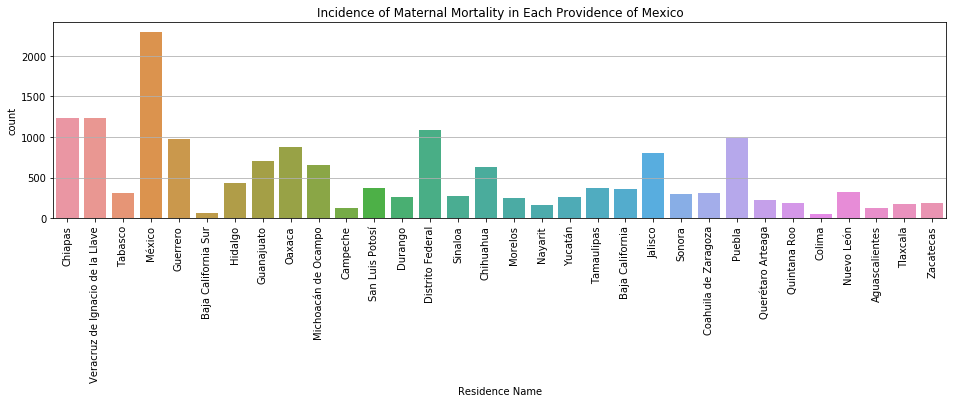

In [44]:
# Create a bar graph to show distribution of incidences of maternal death by region
fig, ax = plt.subplots(figsize=(16, 4))
plt.xticks(rotation='vertical')
plt.grid(True)
fig.subplots_adjust(bottom=0.2)
sns.countplot(dates['Residence Name'])

# Label axis 
pl.title('Incidence of Maternal Mortality in Each Providence of Mexico')

*Preliminary Observation*: It appears that certain regions have the incidence of maternal death more prevenantly than others. Further analysis needs to be performed in order to assess the cause of these differences. For now, it's important to understand that each region has a different population size. Are these populations distributed normally?

Text(0.5,1,'Age Distribution of Maternal Mortality within Each Providence of Mexico')

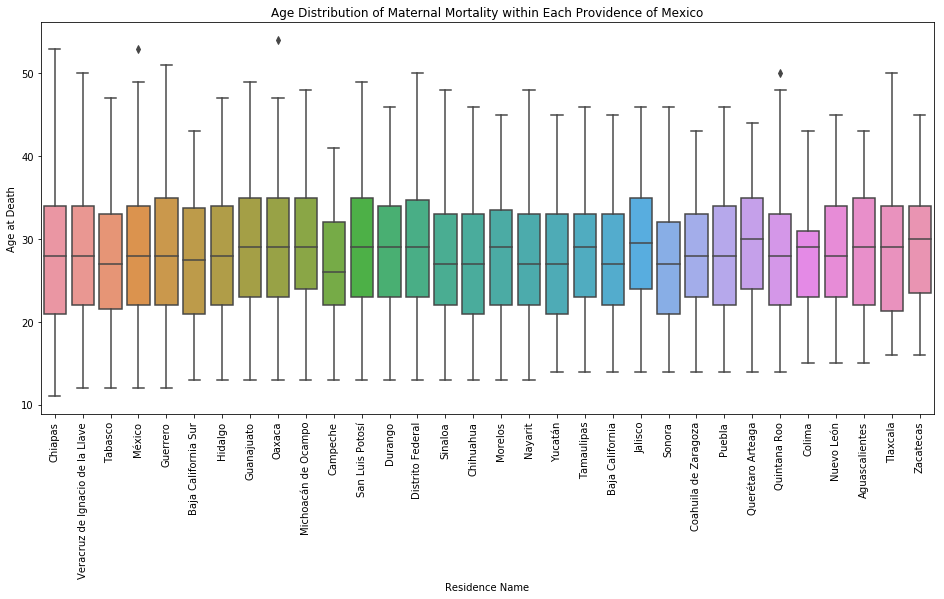

In [45]:
# Create a boxplot to show the distribution of each region compared to its mean
fig, ax = plt.subplots(figsize=(16, 8))
plt.xticks(rotation='vertical')
fig.subplots_adjust(bottom=0.2)
sns.boxplot(x=dates['Residence Name'], y=dates['Age at Death'], data=dates)

# Label axis 
pl.title('Age Distribution of Maternal Mortality within Each Providence of Mexico')

*Preliminary Observation*: As noted above, some Mexican States appear to experience varying instances and age distributions of maternal death. Could this be due to the size of the region or possibly the economic status of the region?

### Step 2: Prepare the Data for Analysis
- Create variables for age distribution by region

In [48]:
# Create a sample region array variables to hold age distribution per region 
# as a model to construct a function to parse through subdataset, region_ages
aqua = dates[dates['Residence Name'] == 'Aguascalientes']
aqua = aqua['Age at Death']
aqua = np.array(aqua)

mex = dates[dates['Residence Name'] == 'México']
mex = mex['Age at Death']
mex = np.array(mex)

print('Aguascalientes Sample Length: '+ str(aqua))
print('México Sample Length: ' + str(mex))

Aguascalientes Sample Length: [15 15 16 16 17 17 17 17 17 17 18 18 18 18 19 19 19 19 20 20 20 20 20 20
 20 21 21 21 21 22 22 22 22 22 22 23 23 23 23 23 23 24 24 24 25 25 25 25
 25 25 26 26 26 27 27 27 28 28 28 28 28 28 29 29 29 29 29 29 30 30 30 30
 30 30 31 31 31 31 31 31 31 32 32 32 32 33 33 33 33 33 33 34 34 34 35 35
 35 35 35 35 35 35 35 36 36 36 36 36 37 37 37 38 38 38 39 39 39 39 39 40
 40 41 42 42 42 43 43]
México Sample Length: [12 12 14 ... 49 49 53]


Since it appears that the sample size of ages of maternal death within the Provinces varies, the total sample per Province should be stored in unique age array variables. The process of creating the age array is repeatable, so a function should be created then applied to each Province. The array of ages variable can then be stored in a dictionary as a value with the associated Province as the key.

In [49]:
# Create a function to group all ages associated with materna death within a Province and store the ages in an array

def age_array(str):
    """Create arrays for all Ages of Maternal Death within a Region"""
    
    # Select the region 'str' from the 'Region' column
    ages = dates[dates['Residence Name'] == str]
    
    # Select the ages within the region
    ages = ages['Age at Death'] 
    
    # Store the ages in an array
    ages = np.array(ages)
    
    # return the unique array
    return ages

In [50]:
# Test output
print('Aguascalientes', age_array('Aguascalientes'))
print('México', age_array('México'))

Aguascalientes [15 15 16 16 17 17 17 17 17 17 18 18 18 18 19 19 19 19 20 20 20 20 20 20
 20 21 21 21 21 22 22 22 22 22 22 23 23 23 23 23 23 24 24 24 25 25 25 25
 25 25 26 26 26 27 27 27 28 28 28 28 28 28 29 29 29 29 29 29 30 30 30 30
 30 30 31 31 31 31 31 31 31 32 32 32 32 33 33 33 33 33 33 34 34 34 35 35
 35 35 35 35 35 35 35 36 36 36 36 36 37 37 37 38 38 38 39 39 39 39 39 40
 40 41 42 42 42 43 43]
México [12 12 14 ... 49 49 53]


In [51]:
# Create a variable for 'Region' names using np.unique()
list_regions = np.unique(dates['Residence Name'])

# Create an empty dictionary to hold the {Region : region_age_array} key pairs
age_by_state = {}

In [52]:
# Use the age_array function with iteration over residence to create the {Region : region_age_array} key pairs
for region in list_regions:
    
    # Add arrays as values in dictionary with region-key
    age_by_state[region] = age_array(region)

In [54]:
# Test output
print('Aguascalientes', age_by_state['Aguascalientes'])

Aguascalientes [15 15 16 16 17 17 17 17 17 17 18 18 18 18 19 19 19 19 20 20 20 20 20 20
 20 21 21 21 21 22 22 22 22 22 22 23 23 23 23 23 23 24 24 24 25 25 25 25
 25 25 26 26 26 27 27 27 28 28 28 28 28 28 29 29 29 29 29 29 30 30 30 30
 30 30 31 31 31 31 31 31 31 32 32 32 32 33 33 33 33 33 33 34 34 34 35 35
 35 35 35 35 35 35 35 36 36 36 36 36 37 37 37 38 38 38 39 39 39 39 39 40
 40 41 42 42 42 43 43]


In [55]:
# Create a sub-dataframe with residence name, code, and population size (unique)

# Var for residence name 
residence_uniq = np.unique(dates['Residence Name'])

# Var for residence code
residence_code = np.unique(dates['Residence Code'])

# Create the sub-dateframe for region and region code
res_dataset = pd.DataFrame(residence_uniq, index=residence_code)
res_dataset = res_dataset.rename(columns={0:'Region'})
res_dataset.head()

,Region
1,Aguascalientes
2,Baja California
3,Baja California Sur
4,Campeche
5,Chiapas


In [56]:
# Calculate the mean age per region
# This section has test trials per entry to help formulate an iteration function

mean_death_list_trial = []

aguas = dates[dates['Residence Code'] == 1 ]
aguas = aguas[['Residence Code', 'Age at Death']]
aguas_mean = aguas['Age at Death'].mean()
aguas_mean = '{0:0.2f}'.format(aguas_mean)
print(aguas_mean)

mean_death_list_trial.append(aguas_mean)
print(mean_death_list_trial)

baja = dates[dates['Residence Code'] == 2 ]
baja = baja[['Residence Code', 'Age at Death']]
baja_mean = baja['Age at Death'].mean()
baja_mean = '{0:0.2f}'.format(baja_mean)
print(baja_mean)

mean_death_list_trial.append(baja_mean)
print(mean_death_list_trial)

28.36
['28.36']
27.15
['28.36', '27.15']


In [57]:
# Create an empty list to store mean age of maternal death per region
region_list = []

# Create an iteration function to calculate the mean age of maternal death per region
for i in dates['Residence Code'].sort_values().unique():
    """Calculate Mean Age per Region"""
    
    #select one region
    sub_df = dates[dates['Residence Code'] == (i - 1)]
    
    #calculate mean of region
    mean = sub_df['Age at Death'].mean()
    
    # append mean to region list
    region_list.append(round(mean, 2)) 

In [58]:
# Test output
print(region_list[2], type(region_list[2]))

27.15 <class 'float'>


In [59]:
# Convert the list to a Series and add as new column to dates
res_dataset['μ Age Maternal Death'] = pd.Series(region_list)
res_dataset

,Region,μ Age Maternal Death
1,Aguascalientes,28.36
2,Baja California,27.15
3,Baja California Sur,27.56
4,Campeche,26.87
5,Chiapas,28.02
6,Chihuahua,27.59
7,Coahuila de Zaragoza,28.24
8,Colima,26.98
9,Distrito Federal,28.84
10,Durango,28.65


----------------------------------------------------------------------------------------------------------------------

*Preliminary Observation*: Since the region 'Zacatecas' has a NaN value for mean age of maternal death, the contents of 'Zacatecas' need to be adjusted from NaN to the actual mean of the data for the res_dataset. *With a quick reference, the initial values in the res_dataset match the individually calculated mean for both Aguascalientes and Baja California, so we know the NaN is not due to shifted values.*

#### Clean Data by Replacing NaN/Null values with the Correct Data

In [60]:
# Calculate the mean Age of Death for region 'Zacatecas'
zaca = dates[dates['Residence Code'] == 32 ]
zaca = zaca['Age at Death']
zaca_mean = zaca.mean()
zaca_mean = round(mean, 2)
print(zaca_mean)

# Change contents of res_dataset NaN to calculated mean
res_dataset = res_dataset.fillna(zaca_mean)
res_dataset.tail()

27.5


,Region,μ Age Maternal Death
28,Tamaulipas,28.26
29,Tlaxcala,28.45
30,Veracruz de Ignacio de la Llave,27.94
31,Yucatán,27.50
32,Zacatecas,27.50


Text(0.5,1,'Mean Age Maternal Mortality in Each Providence of Mexico')

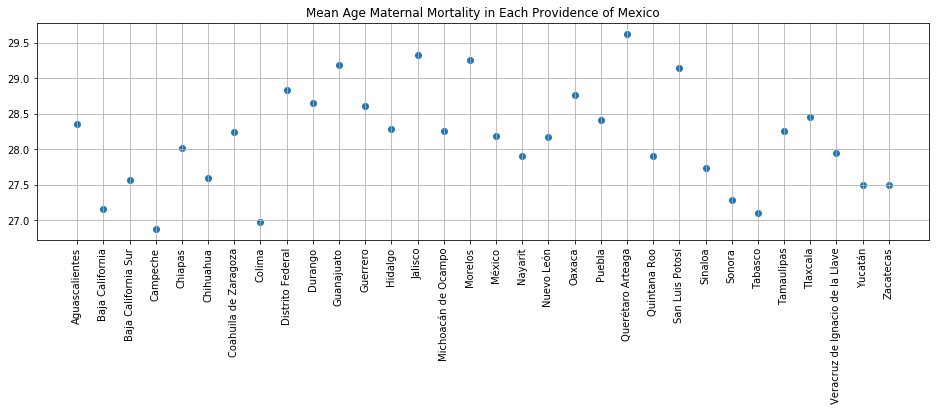

In [61]:
# Create a bar graph to show mean age maternal death by region
fig, ax = plt.subplots(figsize=(16, 4))
plt.xticks(rotation='vertical')
plt.grid(True)
plt.scatter(res_dataset['Region'], res_dataset['μ Age Maternal Death'])

# Label axis 
pl.title('Mean Age Maternal Mortality in Each Providence of Mexico')

***Further Investigation Needed***: The difference between the means of each region within Mexico needs to be analyzed to evaluate if theres differences are statistically significant. This can be accomplished by running an ANOVA analysis.

### Step 3: Statistical Inference - ANOVA Examination

A **One-Way Analysis of Variance (ANOVA)** test compares the means of two or more groups to determine if at least one group mean is statistically different from the others. These assumptions that must be satisfied in order for the associated p-value to be valid:

1. The samples are independent.
2. Each sample is from a normally distributed population.
3. The population standard deviations of the groups are all equal. (homoscedasticity)

#### 1. Samples must be Random / Independent

#### 2. Samples must be Normally Distributed

**Within the SciPy module of python 3, there is a normalcy function** that tests the null hypothesis that a sample comes from a normal distribution. It is based on **D’Agostino** and **Pearson’s test** that combines skew and kurtosis to test of normality. This function be used to further determine if the distribution of each Province sample population is normally distributed.

In [62]:
# Create a variable to hold list of Regions with normally-distributed sample sizes
norm_distr_regions = []

# Create a variable to hold list of Regions without normally-distributed sample sizes
not_norm_distr_regions = []

In [63]:
# Determine if each Province has a normally distributed sample population of ages

for region in age_by_state:
    """Determine if Region Age Distribution is Normal"""
    
    # Select age array by Region key in database
    region_name = str(region)
    arr = age_by_state[region_name]
    
    # Skewtest (k2) is not valid with less than 8 samples
    if len(arr) > 8:
        
        # Test for normalcy of distribution (with Skewtest)   
        k2, p = stats.normaltest(arr)

        # Set significance level to 95% confidence
        alpha = 0.05
        print("p = {:g}".format(p))
        print("n = " + str(len(arr)))

        # Print result for each region normalcy test
        if p < alpha:  # null hypothesis: x comes from a normal distribution
            print(str(region)+ " IS normally distributed.")
            
            # Add region to list of regions for statistical analysis
            norm_distr_regions.append(region_name)
            
        else:
            print(str(region)+ " *IS NOT* normally distributed.")
              
            # Add region to list of regions NOT for statistical analysis
            not_norm_distr_regions.append(region_name)
                
    else: 
        print(str(region)+ " *sample size is too small*")
        
        # Add region to list of regions NOT for statistical analysis
        not_norm_distr_regions.append(region_name)

p = 8.92987e-06
n = 127
Aguascalientes IS normally distributed.
p = 9.69442e-10
n = 361
Baja California IS normally distributed.
p = 0.00564503
n = 66
Baja California Sur IS normally distributed.
p = 0.00137276
n = 126
Campeche IS normally distributed.
p = 1.03976e-37
n = 1235
Chiapas IS normally distributed.
p = 8.42917e-19
n = 628
Chihuahua IS normally distributed.
p = 1.6423e-09
n = 310
Coahuila de Zaragoza IS normally distributed.
p = 0.788087
n = 49
Colima *IS NOT* normally distributed.
p = 2.13913e-21
n = 1082
Distrito Federal IS normally distributed.
p = 8.83805e-06
n = 263
Durango IS normally distributed.
p = 6.25818e-14
n = 707
Guanajuato IS normally distributed.
p = 6.26788e-20
n = 977
Guerrero IS normally distributed.
p = 1.22187e-06
n = 428
Hidalgo IS normally distributed.
p = 3.85647e-24
n = 802
Jalisco IS normally distributed.
p = 3.0739e-14
n = 654
Michoacán de Ocampo IS normally distributed.
p = 1.07763e-05
n = 243
Morelos IS normally distributed.
p = 1.9078e-37
n = 229

In [68]:
print('Not Normally Distributed: ', list(np.unique(not_norm_distr_regions)))

Not Normally Distributed:  ['Colima', 'Quintana Roo']


**Normalcy Conclusion**: After assessing the distribution of age of maternal death within each Province of Mexico, **all Province sample populations are considered to be normally distributed** *aside from* Colima (p-value: 2.13913e-21, n=1082) Quintana Roo (p-value: 0.00022599, n=375), which were found to *not be normally distributed*. 

However, under the Central Limit Theorem (CLT), the sampling distribution of the sample means approaches a normal distribution as the sample size ( n ) gets larger - regardless of what the shape of the population distribution. Under this theorem,  n>30  is considered a large sample size. *Since the current database sample size (n) of Colima and Quintana Roo of 1082 and 375, respectively, justify CLT being assumed.* 

#### 3. Homogeneity of Variance: All comparison groups have the same variance with Barlett's Test.
- Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances for samples from significantly normal population distributions. 
- *Extra Analysis*: Calculate the standard deviation and variance of each population

#### Bartlett’s Test for Homogeneity of Variance
$H$o: All region age of maternal mortality populations have equal variance. <br>  $v$1 = $v$2 = $v$3 = .... = $v$32

$H$a: There is at least one region age of maternal mortality population variance is statistically different from the rest. <br> $v$1 ≠ $v$2 = .... = $v$32

Significance Level: *95%* Confidence. <br> $α$ = 0.05

In [81]:
# Calculate the age variance per region - This section has test trials per entry to help formulate an iteration function

# Aquascalientes and Baja California
print(stats.bartlett(age_by_state['Aguascalientes'], age_by_state['Baja California']))

# Aquascalientes and Baja California Sur
print(stats.bartlett(age_by_state['Aguascalientes'], age_by_state['Baja California Sur']))

BartlettResult(statistic=1.5499938218119378, pvalue=0.2131363529440692)
BartlettResult(statistic=0.0026360082272445526, pvalue=0.959052944694013)


*Preliminary Conclusion*: Even during the calculating all Bartlett results between region populations, it is evident that not all regions have the same variance.

In [71]:
# Calculate the age standard deviation and variance per region - 
# This section has test trials per entry to help formulate an iteration function

aguas = dates[dates['Residence Code'] == 1 ]
aguas = aguas[['Residence Code', 'Age at Death']]
aguas_std = statistics.pstdev(aguas['Age at Death'])
aguas_var = statistics.pvariance(aguas['Age at Death'])

print('Aguas', aguas_std, aguas_var)

baja = dates[dates['Residence Code'] == 2 ]
baja = baja[['Residence Code', 'Age at Death']]
baja_std = statistics.pstdev(baja['Age at Death'])
baja_var = statistics.pvariance(baja['Age at Death'])

print('Baja Cal', baja_std, baja_var)

Aguas 7.426987701638709 55.16014632029264
Baja Cal 6.805289717580556 46.31196814020764


In [82]:
# Create an empty list to store the std of maternal death per region
region_bartlett = {}

In [83]:
# Use Bartlett to determine if the variance of ages from the mean is different between regions

for region in age_by_state:
    """Calculate Bartlett between 2 Regions"""
    
    # Select first age array by Region key in database
    region_name = str(region)
    arr = age_by_state[region_name]
    
    for region_2 in age_by_state:
        
        # Select second age array by Region key in database
        region_name_2 = str(region_2)
        arr_2 = age_by_state[region_name_2]
        
        if region_name != region_name_2:
            
            # Compare the variations of the two populations
            bartlett = stats.bartlett(arr, arr_2)
            
            # Create a combined key for new dictionary
            combined_key = str(region_name) + " + " + str(region_name_2)
            
            # Avoid duplicate entries by testing for the reverse key
            reversed_key = str(region_name_2) + " + " + str(region_name)
    
            if combined_key and reversed_key not in region_bartlett:
            
                # append bartlett value to combined region key bartlett
                region_bartlett[combined_key] = bartlett

In [89]:
# Test output
print(len(region_bartlett))
print(region_bartlett['Aguascalientes + Baja California'])
print(region_bartlett['Aguascalientes + Baja California Sur'])

496
BartlettResult(statistic=1.5499938218119378, pvalue=0.2131363529440692)
BartlettResult(statistic=0.0026360082272445526, pvalue=0.959052944694013)


*Preliminary* **Conclusion for Homogeneity of Variance**: As stated above, it is clear that the Bartlett Result shows differing Variance relationships between different Mexican States. Luckily, the proof for ANOVA test is robust, so slight variations from its proof criteria are  OK (source: https://faculty.elgin.edu/dkernler/statistics/ch13/13-1.html). A good rule of thumb is that as long as the largest variance is no more than double the smallest, we can assume ANOVA's requirement for Homogeneity of Variance is satisfied.

#### Evaluate the differences between the largest and smallest Region variances in Mexico.

In [90]:
# Create an empty list to store age of maternal death standard deviation per region
region_std = []

# Create an empty list to store age of maternal death variance per region
region_var = []

# Create an iteration function
for i in dates['Residence Code'].sort_values().unique():
    """Calculate Age Standard Deviation and Age Variance per Region"""
    
    #select one region
    sub_df = dates[dates['Residence Code'] == i]
    age = list(sub_df['Age at Death'])
   
    # calculate standard deviation of region population with pstdev()
    std = statistics.pstdev(age)
    
    # calculate age variance of region population with pstdev()
    var = statistics.pvariance(age)
    
    # prevent repeat entries in lists
    for region in sub_df['Residence Name'].unique():
        
        # append std to region list
        region_std.append(round(std, 2))
   
        # append var to region list
        region_var.append(round(var, 2)) 

In [91]:
# Test output - Make sure it matches Test Results
print('Test Results - Aguas', round(aguas_std, 2), round(aguas_var,2))
print('Function Results - Aguas', region_std[0], region_var[0])

Test Results - Aguas 7.43 55.16
Function Results - Aguas 7.43 55.16


In [92]:
# Convert the list to a Series and add as new column to dates
res_dataset['Standard Deviation'] = pd.Series(region_std, index=np.arange(1,33))
res_dataset['Variance'] = pd.Series(region_var, index=np.arange(1,33))
res_dataset

,Region,μ Age Maternal Death,Standard Deviation,Variance
1,Aguascalientes,28.36,7.43,55.16
2,Baja California,27.15,6.81,46.31
3,Baja California Sur,27.56,7.44,55.37
4,Campeche,26.87,6.65,44.29
5,Chiapas,28.02,6.71,45.02
6,Chihuahua,27.59,6.33,40.12
7,Coahuila de Zaragoza,28.24,7.85,61.58
8,Colima,26.98,7.43,55.14
9,Distrito Federal,28.84,7.13,50.84
10,Durango,28.65,7.60,57.71


In [96]:
# Create variables for minimum and maximum variation values in res_dataset
max_variance = res_dataset['Variance'].max()
print('Max Variance: ', max_variance)

min_variance = res_dataset['Variance'].min()
print('Min Variance: ', min_variance)

# Check if largest variance is more than double the smallest
if (2*min_variance) >= max_variance:
    print('Accept ANOVA: The max variance is less than double the min variance.')
else: 
    print('Reject ANOVA: The max variance is more than double the min variance.')

Max Variance:  61.58
Min Variance:  40.12
Accept ANOVA: The max variance is less than double the min variance.


**Final Conclusion for Homogeneity of Variance**: Since the maximum variance within the dataset (61.68) is less than double the minimum variance within the dataset (40.12, whichs doubles to 80.24), we can assume ANOVA's requirement for Homogeneity of Variance is satisfied.

## One-Way Analysis of Variance

$H$o: All mean age of death of maternal women within all Province of Mexico are statistically similar. <br>  $μ$1 = $μ$2 = $μ$3 = .... = $μ$32

$H$a: There is at least one mean age of death of maternal women within a Province of Mexico that is statistically different from the rest. <br> $μ$1 ≠ $μ$2 = .... = $μ$32

Significance Level: *95%* Confidence. <br> $α$ = 0.05

In [115]:
# Create a list variable to hold all Region Age arrays 
all_age_arrays = []

# Iterate over dictionary to create a list
for key, value in age_by_state.items():
    
    # Append region age array to all_age_arrays
    all_age_arrays.append(value)

In [117]:
# Test output
all_age_arrays[0]

array([15, 15, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19,
       19, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 22,
       22, 23, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26,
       26, 26, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29,
       30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32,
       33, 33, 33, 33, 33, 33, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35,
       35, 36, 36, 36, 36, 36, 37, 37, 37, 38, 38, 38, 39, 39, 39, 39, 39,
       40, 40, 41, 42, 42, 42, 43, 43])

In [118]:
# Perform the ANOVA test on all_age_arrays variable
[f_value, p_value] = stats.f_oneway(all_age_arrays)

ValueError: setting an array element with a sequence.

----------------------------------------------------------------------------------------------------------------------

## Follow-Up Questions: How many instances of adolescent maternal mortality are within Mexico? How does this compare to the total instances of maternal mortality? 
- The World Health Organization (WHO) states that an upwards of 13 million *adolescent girls (ages under 20)* give birth every year, and complications from those pregnancies and childbirth are a leading cause of death for those young mothers.

### Step 1: Explore the Data and Create Clean Sub-Dataframe for Analysis

In [119]:
adolescent_matern_mortality = dates[dates['Age at Death'] <= 20 ]
adolescent_matern_mortality.head()

,Date of Birth,Date of Death,Age at Death,Reason for Mortality,Residence Code,Residence Name,Local Community Size,Population
0,1998-7-7,2009-7-7,11,1,7,Chiapas,1,1 a 999 habitantes
1,1996-1-1,2008-12-12,12,1,30,Veracruz de Ignacio de la Llave,11,50000 a 74999 habitantes
2,2001-12-12,2014-5-5,12,1,27,Tabasco,14,250000 a 499999 habitantes
3,1983-11-11,2002-6-6,12,1,15,México,4,2500 a 4999 habitantes
4,1993-0-0,2005-1-1,12,1,12,Guerrero,4,2500 a 4999 habitantes


In [120]:
# Create a variable for adolescent_ages_maternal_mortality
adolescent_ages = adolescent_matern_mortality['Age at Death']

# Create a variable for adolsecent_sample_size
adolsecent_sample_size = len(adolescent_ages)
adolsecent_sample_size

2885

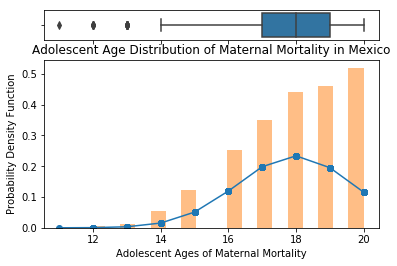

'The sample(n=2885) population mean age of adolescent maternal mortality is 17.98 years old with a standard deviation of 1.71.'

In [121]:
# Create a figure with two plots
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add boxplot for maternal death
sns.boxplot(adolescent_ages, ax=boxplot)

# Remove x-axis label from boxplot
boxplot.set(xlabel='')

# Add histogram and normal curve for maternal death
fit = stats.norm.pdf(adolescent_ages, np.mean(adolescent_ages), np.std(adolescent_ages))
pl.plot(adolescent_ages, fit, '-o')
pl.hist(adolescent_ages, density=True, alpha=0.5, bins=20)

# Label axis 
pl.xlabel('Adolescent Ages of Maternal Mortality')
pl.ylabel('Probability Density Function')
pl.title('Adolescent Age Distribution of Maternal Mortality in Mexico')

# Show plot and add print mean and std sample information
plt.show()
'The sample(n=' + str(adolsecent_sample_size) + ') population mean age of adolescent maternal mortality is ' + str(round(np.mean(adolescent_ages), 2)) + ' years old with a standard deviation of ' + str(round(np.std(adolescent_ages), 2)) + '.'

*Preliminary Observation*: The distribution appears to have a skewed-right distributed based off of the histogram and boxplot of instance of adolescent maternal mortality. 

### Step 2: Prepare the Data for Analysis
- Create variables for age distribution by region

### Step 3: Inferential Statistics
#### Bootstrap Simulation: Compare the Sample Mean to a Statistically-Likely Population Mean

#### Statistical Testing of Data Mean

$H$o: The mean age of death of maternal women in Mexico is equal to the mean age of death presented in the dataset ($28.35 yoa$). <br>  Empirical Mean ($μ$) − Population Mean ($μ$) = 0

$H$a: The mean age of death of maternal women in Mexico is *not* equal to the mean age of death presented in the dataset ($28.35 yoa$). <br> Empirical Mean ($μ$) − Population Mean ($μ$) ≠ 0

Significance Level: *95%* Confidence. <br> $α$ = 0.05

#### Calculate the size, mean, and standard deviation of *dates*[ 'Age at Death' ]

In [125]:
# Create variables for sample statistical information
adolescent_ages_std = adolescent_ages.std()
mean_adolescent_ages = adolescent_ages.mean()

# Create an array of the sample mean that is equal to the boostrap array length
adolescent_ages_arr = np.full(10000, mean_adolescent_ages)

print('sample size: ', adolsecent_sample_size)
print('sample mean age of death: ', mean_adolescent_ages)
print('sample standard deviation: ', adolescent_ages_std)

sample size:  2885
sample mean age of death:  17.97677642980936
sample standard deviation:  1.7061774866900203


#### Create a 10,000 bootstrap replication with boostrap replicate functions

In [126]:
# Create 10000 bootstrap replicates of the mean and take the mean of the returned array
boot_tenthousand =  draw_bs_reps(adolescent_ages, np.mean, size=10000)
print('bootstrap mean adolescent age of death: ' + str(np.mean(boot_tenthousand)))

bootstrap mean adolescent age of death: 17.976059514731368


#### Calculate the difference between the bootrap and sample means with p-value and standard deviation

In [127]:
# Compute p-value
p_val = np.sum(boot_tenthousand >= materna_mean_arr) / len(boot_tenthousand)
print('p-value: {0:0.4f}'.format(p_val))

# Calculate the standard margin of error for a 95% confidence interval
conf_int_low = mean_age-(1.98*(materna_age_std/math.sqrt(materna_sample_size)))
conf_int_high = mean_age+(1.98*(materna_age_std/math.sqrt(materna_sample_size)))
print('95% Confidence Interval: [{0:0.4f}  {1:0.4f}]'.format(conf_int_low, conf_int_high))

p-value: 0.0000
95% Confidence Interval: [28.2440  28.4689]


**Conclusion from the Bootstrap Hypothesis Test:** The resulting population mean of maternal death approximation based on 10,000 bootstrap replicate samples was *28.3564 years of age (yoa)*, which is close to the sample mean of *28.3568 yoa* old from the dataset. Additionally, the bootstrap population mean is within the 95% Confidence Interval, *28.2443 to 28.4692 yoa* with a p-value of 0.4959, which is greater than α = 0.05. Therefore, the null hypothesis that the mean age of death of maternal women in Mexico is equal to the mean age of death presented in the dataset can be accepted. **$Ho$ is accepted**.

### Step 4: Exploratory Data Analysis of State Means

#### Visualize the distribution of Mean Age of Maternal Death